In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# import utils
from utils.paths import DATA_RAW_DIR
from pathlib import Path

In [3]:
# define path
path_wine = DATA_RAW_DIR / "w6_winequality-red-Tarea-3.csv"
print(f"Path to data: {path_wine}")
print(f"Path exists: {path_wine.exists()}")

Path to data: /Users/jssdev/Dev/Learning/uc/mcd-data-visualization/data/raw/w6_winequality-red-Tarea-3.csv
Path exists: True


In [4]:
# load the dataset
df_wine = pd.read_csv(path_wine, sep=',', encoding='utf-8')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
# display basic info about the dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# null values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# shape
df_wine.shape

(1599, 12)

In [8]:
# display basic statistics about the dataset
df_wine.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

/var/folders/_t/h3_2dkhs547fvj9rymbnvxjm0000gn/T/ipykernel_10304/4108365083.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')


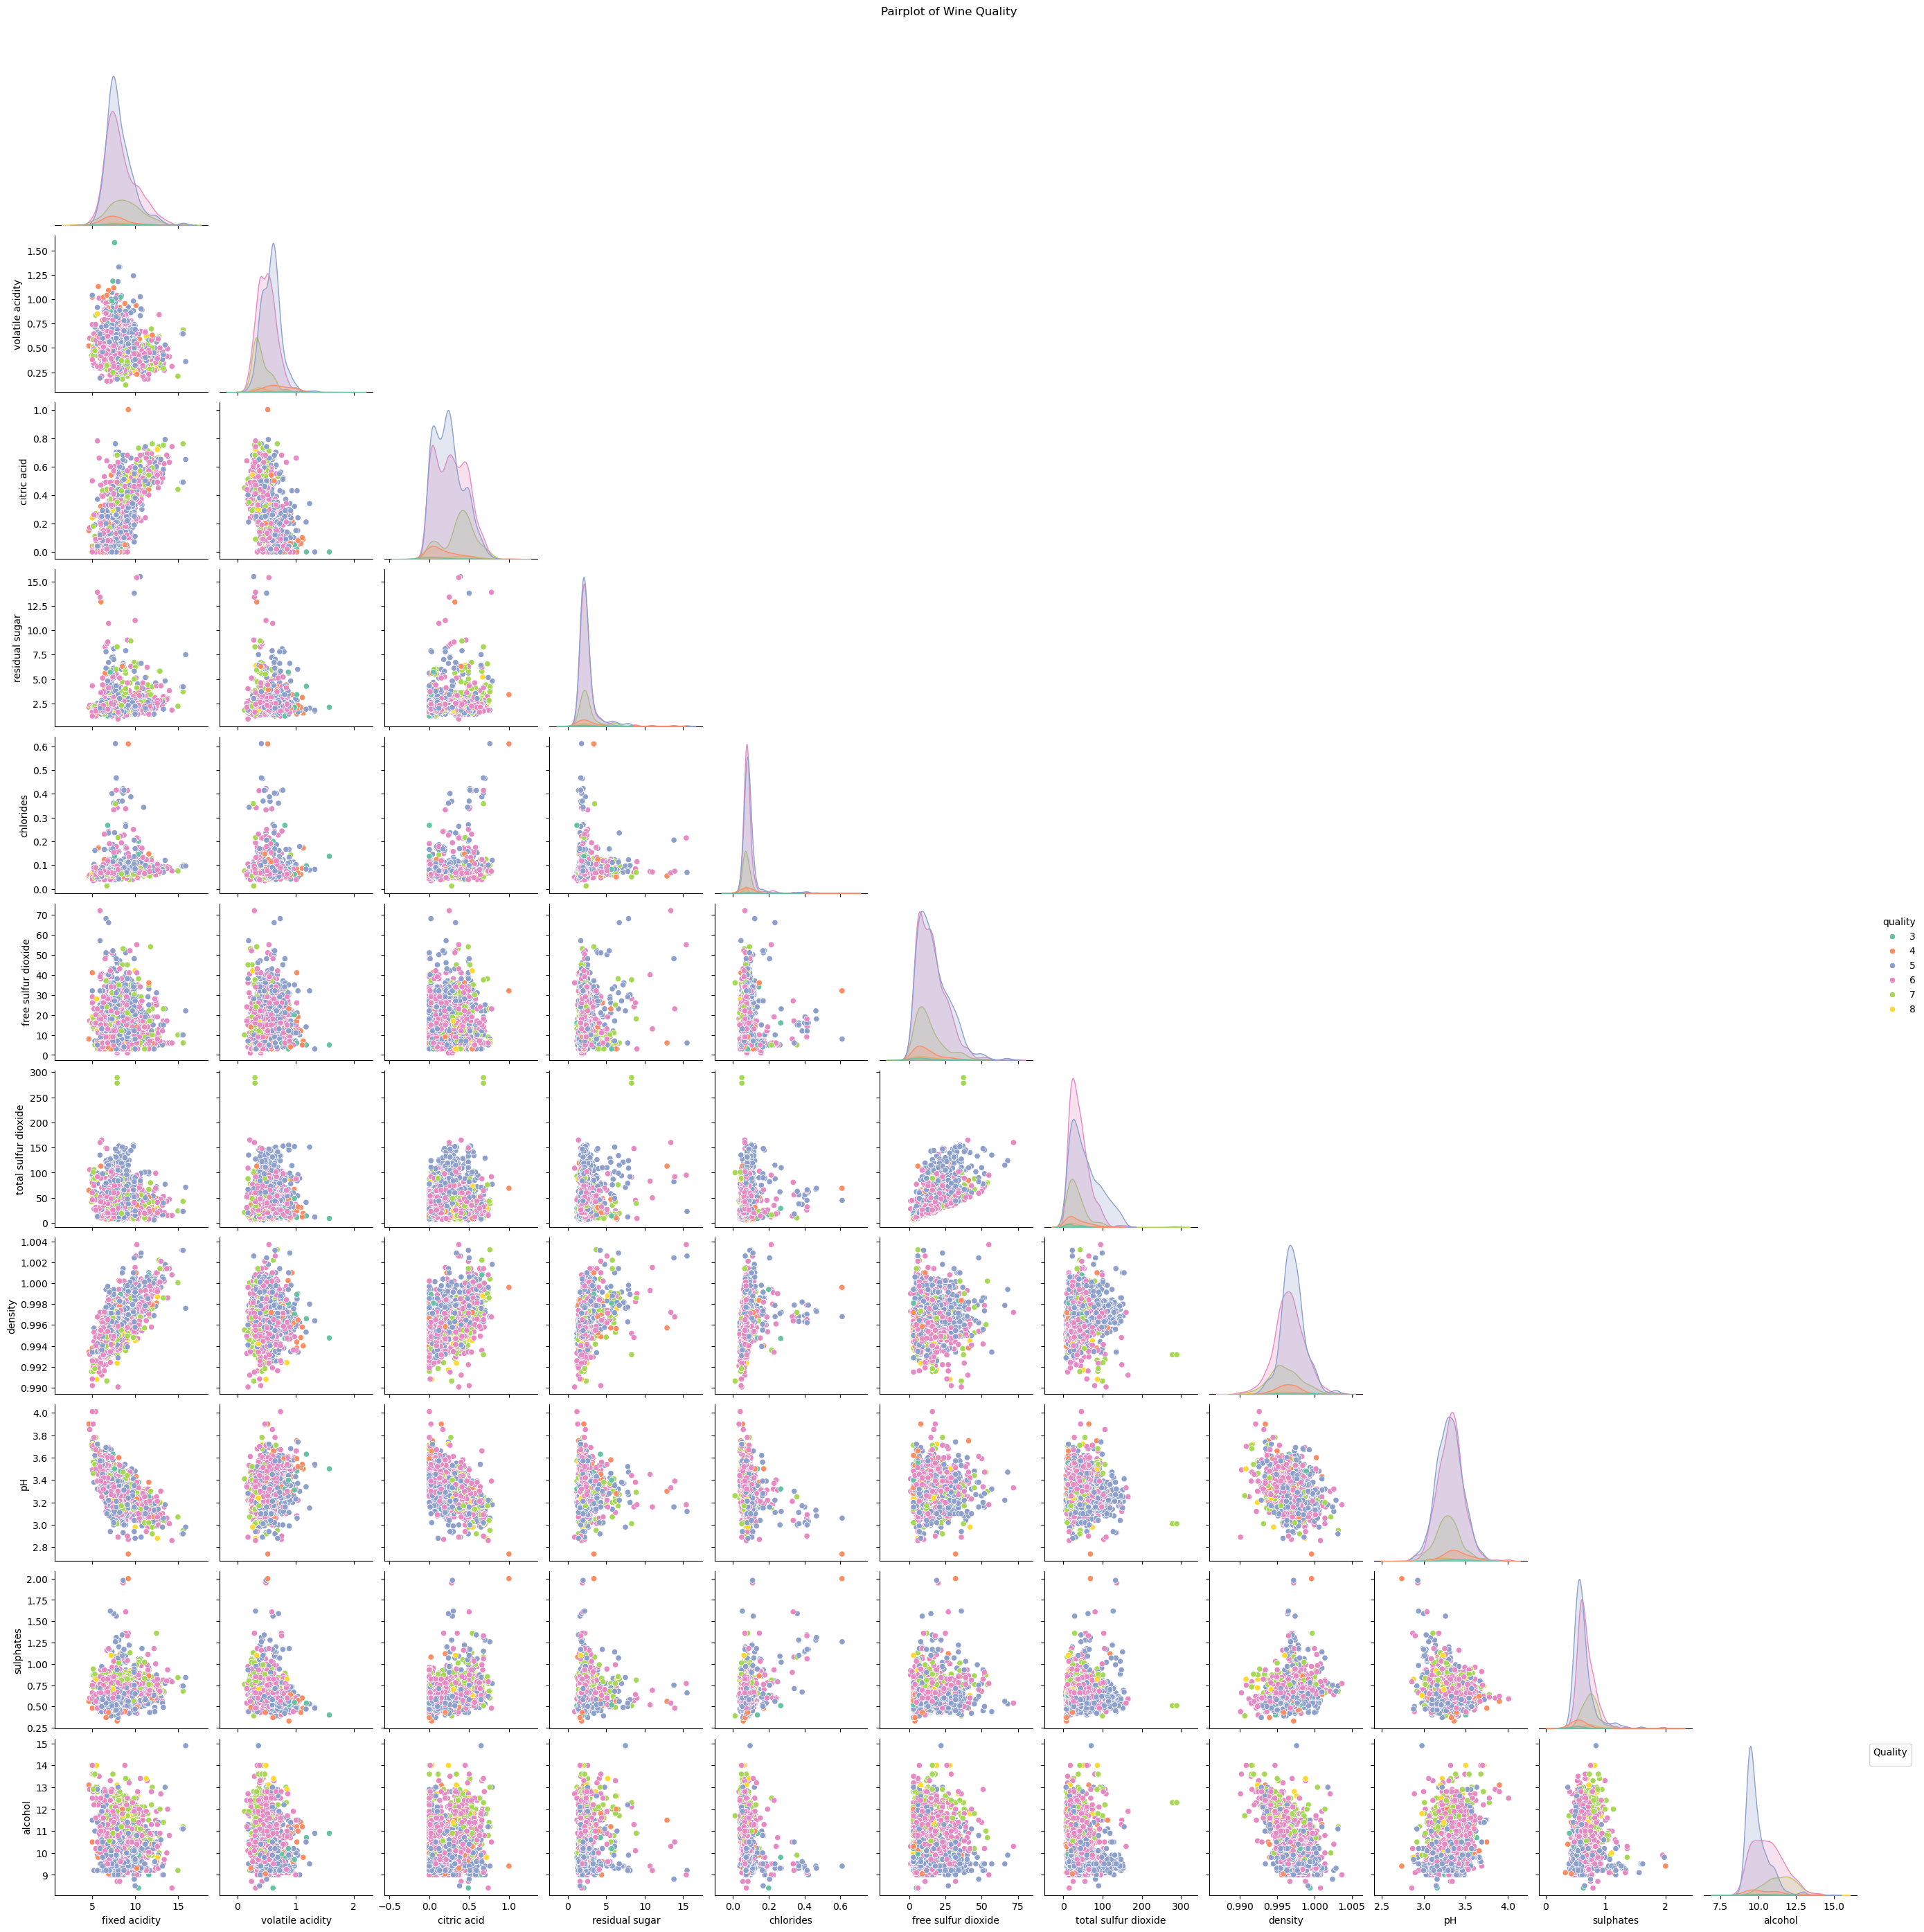

In [9]:
# Feature pairplot
sns.pairplot(df_wine, hue='quality', corner=True, palette='Set2')
plt.suptitle("Pairplot of Wine Quality", y=1.02)
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [10]:
# dataset filtered with 'quality' above 5
df_wine_high_quality = df_wine[df_wine['quality'] > 5]
df_wine_high_quality.shape

(855, 12)

/var/folders/_t/h3_2dkhs547fvj9rymbnvxjm0000gn/T/ipykernel_10304/2870815189.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')


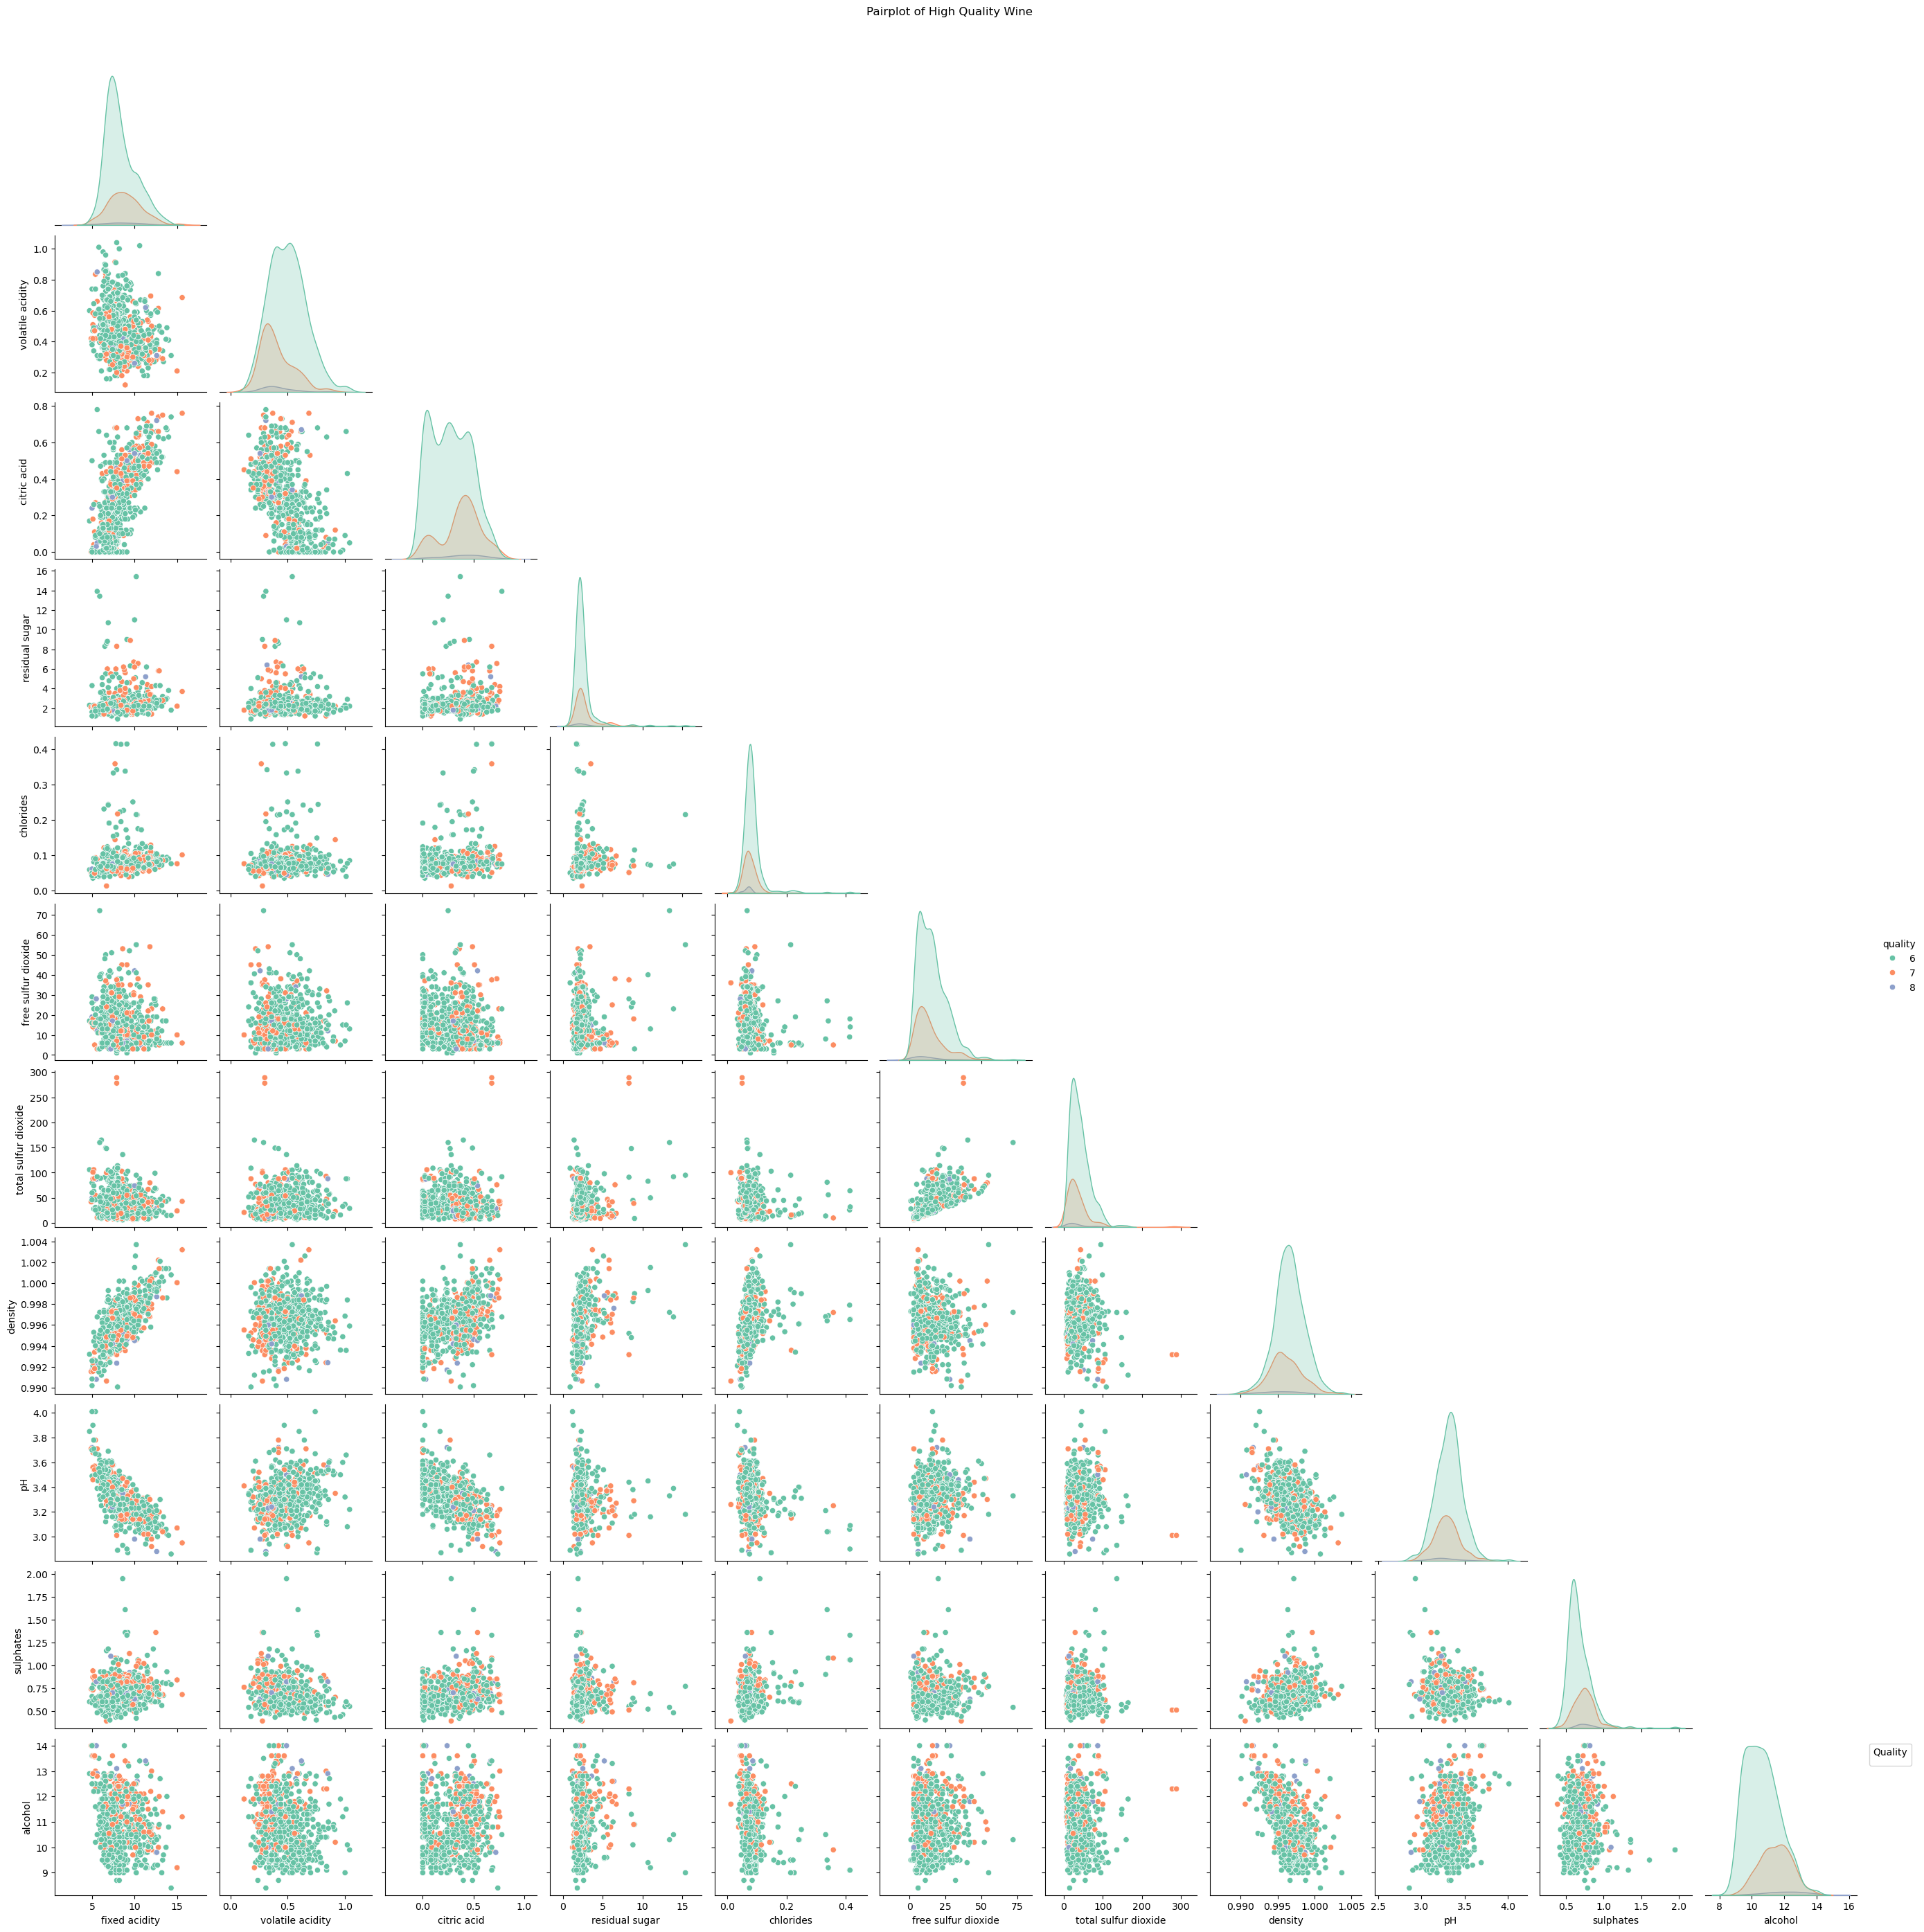

In [11]:
# Feature pairplot with high quality wines
sns.pairplot(df_wine_high_quality, hue='quality', corner=True, palette='Set2')
plt.suptitle("Pairplot of High Quality Wine", y=1.02)
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Comentarios de pregunta 3

#### Preguna 3
Para esta actividad deberás, en primer lugar, escoger de algún modo los 5 pares de columnas que mejor separan a los vinos de mejor calidad de los de peor calidad. Un vino se dirá de buena calidad si su "quality" es mayor a 5. En esta sección se espera también que expliques tus elecciones y muestres por lo menos dos ejemplos de pares de columnas que no separen bien los datos.

#### Respuesta

Si solo tomo una decision por la grafica podria decir que las siguientes podrian explicar el comportamiento de la calidad.
* `citric acid - fixed acidity` tienen una correlacion positiva y directamente proporcional
* `Density - fixed acidity` tienen una correlacion positiva y directamente proporcional
* `pH - fixed acid` tienen una correlacion negativa e inversamente proporcional
* `citric acid - volatile acidity` tienen una correlacion negativa e inversamente proporcional
* `total sulfur dioxide - Free sulfur dioxide` tienen una correlacion positiva y directamente proporcional
* `pH - Density` ienen una correlacion negativa e inversamente proporcional

Los siguientes pares no permiten concluir algo solo con la visualizacion, ya que no se ve una tendencia clara:
* `pH - volatile acidity`
* `sulphates - volatile acidity`
* `sulphates - fixed acidity`

Todo esto lo podemos comprobar con las correlaciones y un grafico heatmap

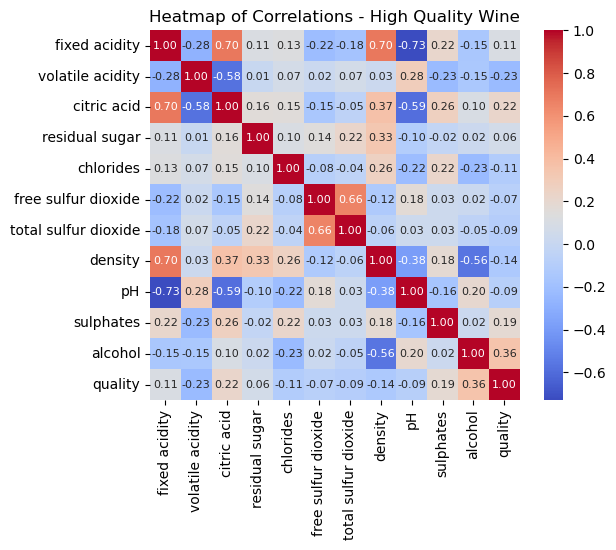

In [12]:
# heatmap of correlations
corr_matrix = df_wine_high_quality.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, annot_kws={"size": 8})
plt.title("Heatmap of Correlations - High Quality Wine")
plt.show()

#### Comentarios

Las correlaciones positivas mas altas:
* `citric acid - fixed acidity` = 0.70
* `density - fixed acidity` - 0.70
* `free sulfur dioxide - total sulfur dioxide` = 0.66

Las Correlaciones negativas mas bajas:
* `pH - fixed acidity` = -0.73
* `pH - citric acid` = -0.59
* `citric acid - volatile acidity` = -0.58




# PCA

In [13]:
# dataset without quality column
df_wine_features = df_wine.drop(columns=['quality'])
df_wine_features.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

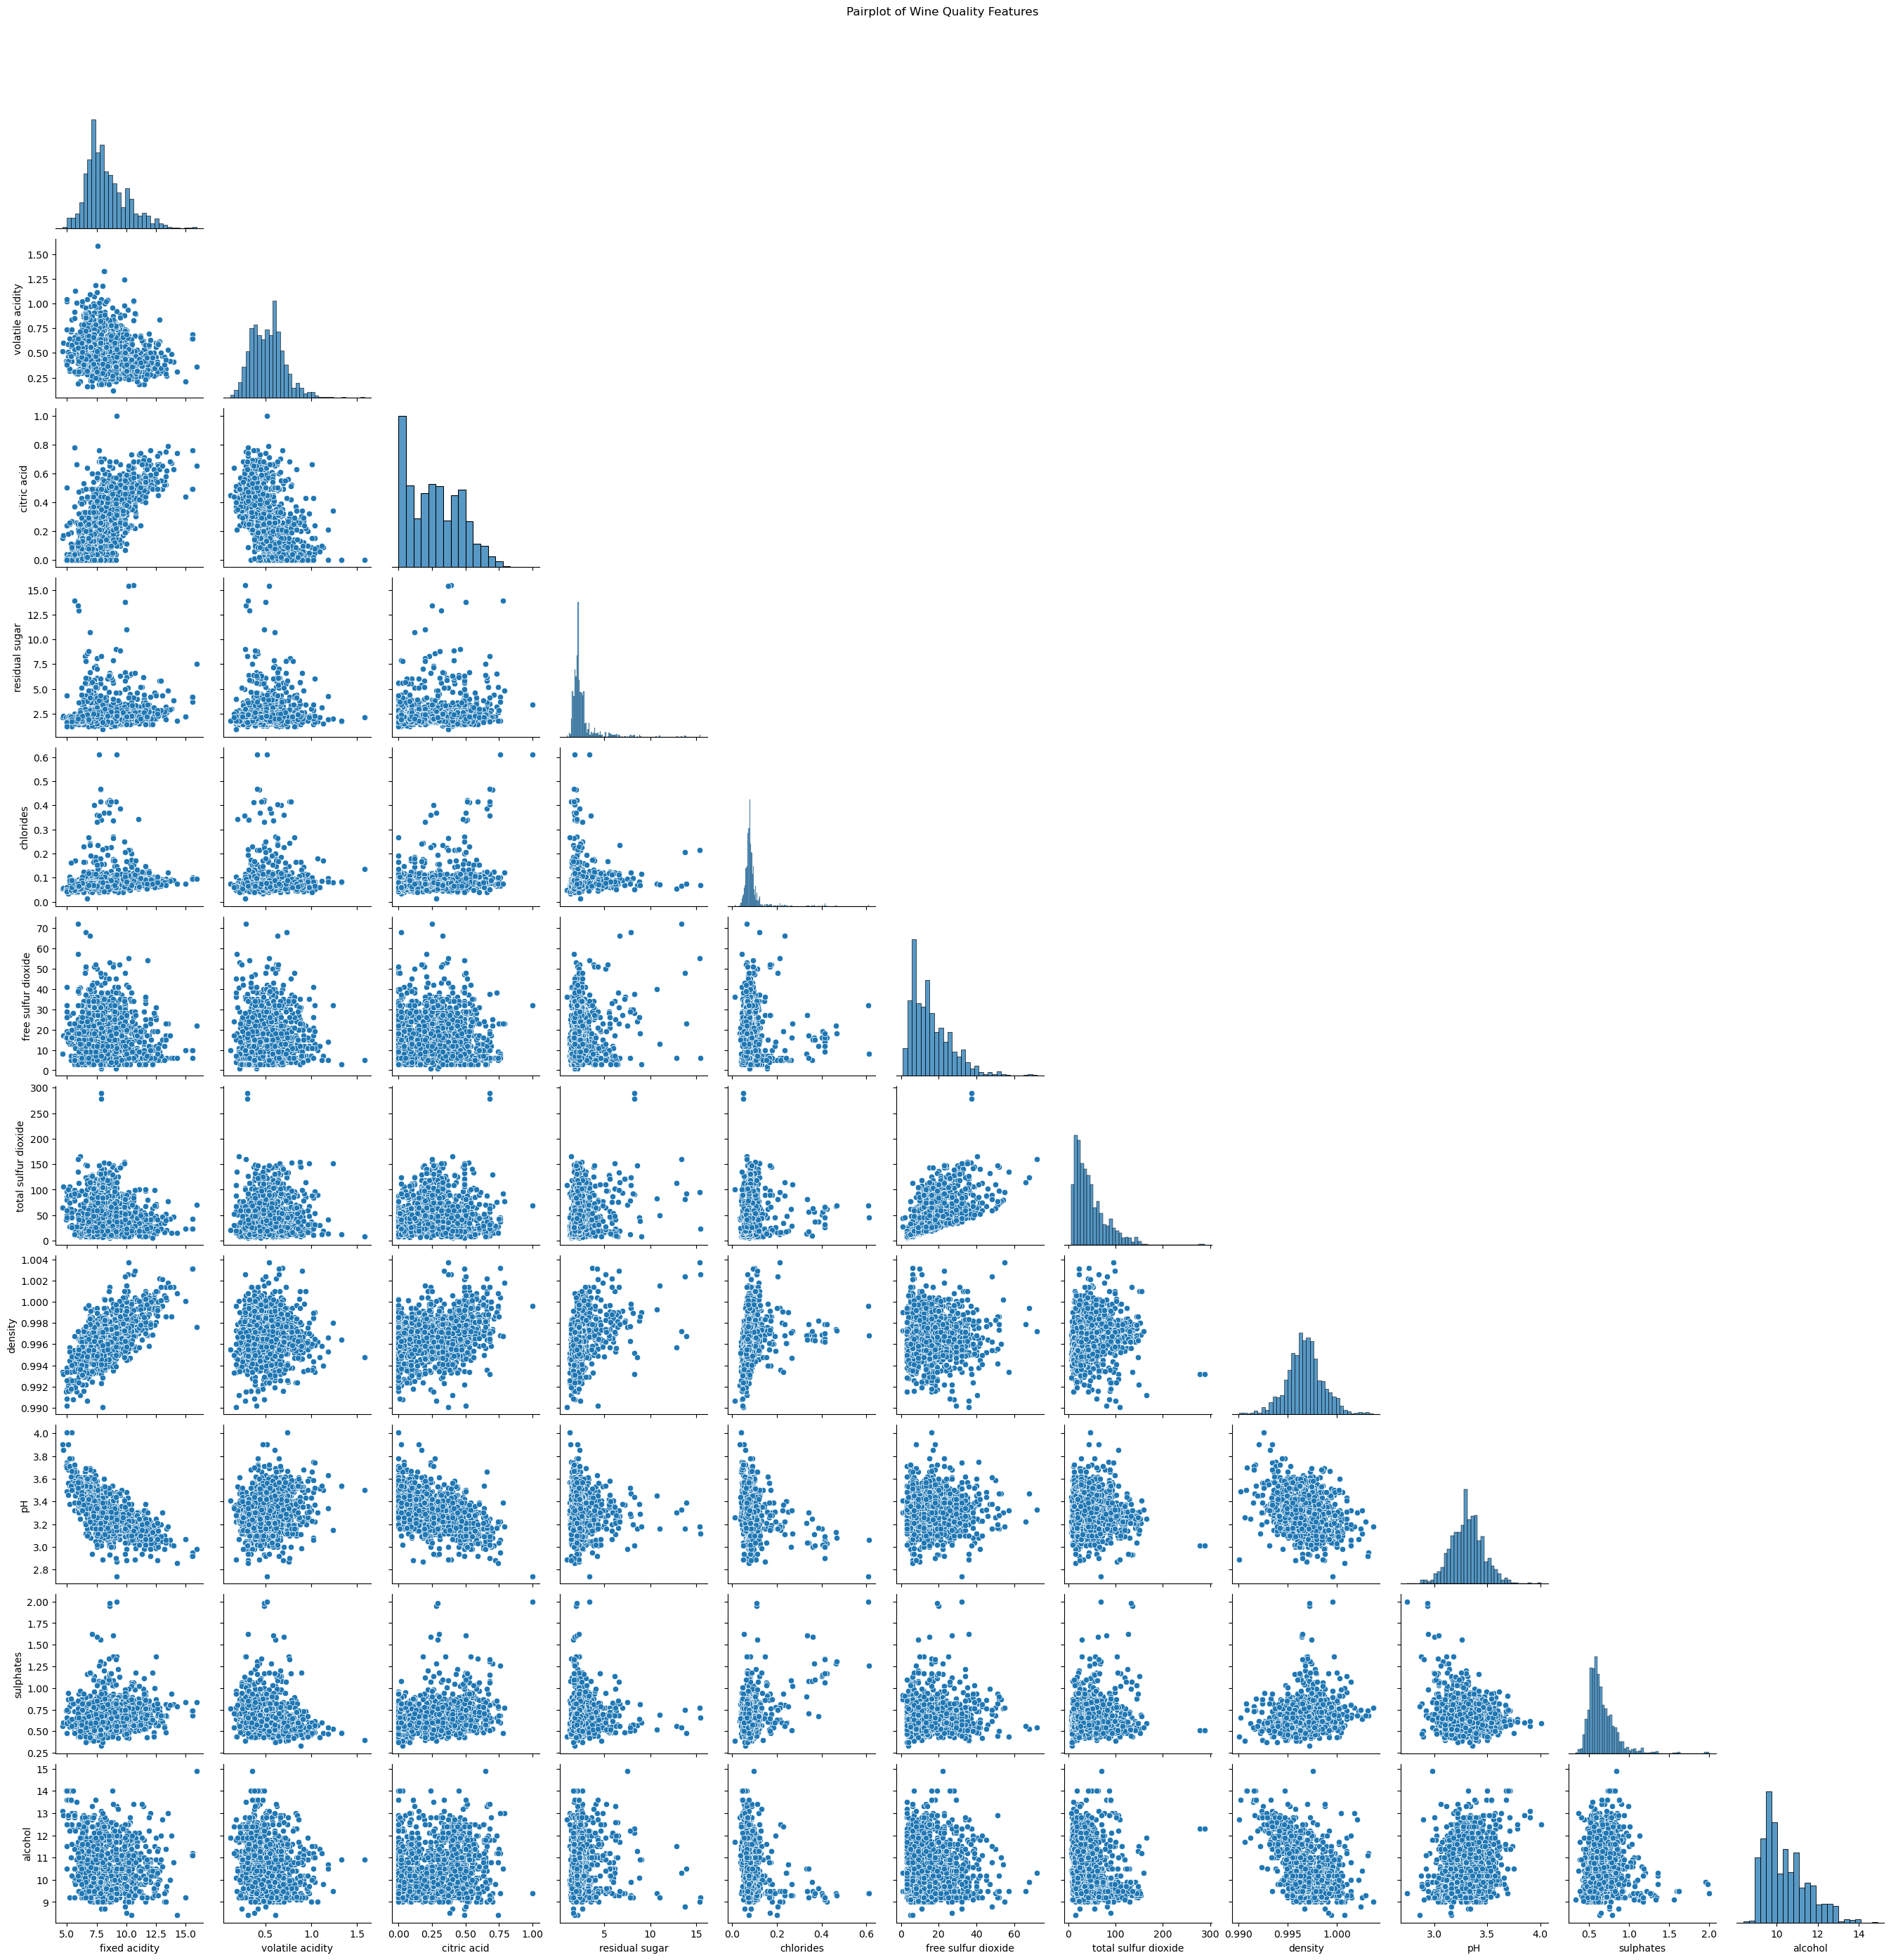

In [14]:
# Feature pairplot
sns.pairplot(df_wine_features, corner=True)
plt.suptitle("Pairplot of Wine Quality Features", y=1.02)
plt.show()

In [15]:
## Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine_features)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [16]:
# PCA
pca = PCA(n_components=2).fit_transform(X_scaled)
print(pca.shape)

# convert to dataframe
df_pca = pd.DataFrame(data=pca, columns=['PCA1', 'PCA2'])
df_pca.head()

(1599, 2)


PCA1      PCA2
0 -1.619530  0.450950
1 -0.799170  1.856553
2 -0.748479  0.882039
3  2.357673 -0.269976
4 -1.619530  0.450950

In [17]:
# add quality column to the PCA dataframe
df_pca['quality'] = df_wine['quality'].values
df_pca.head()

PCA1      PCA2  quality
0 -1.619530  0.450950        5
1 -0.799170  1.856553        5
2 -0.748479  0.882039        5
3  2.357673 -0.269976        6
4 -1.619530  0.450950        5

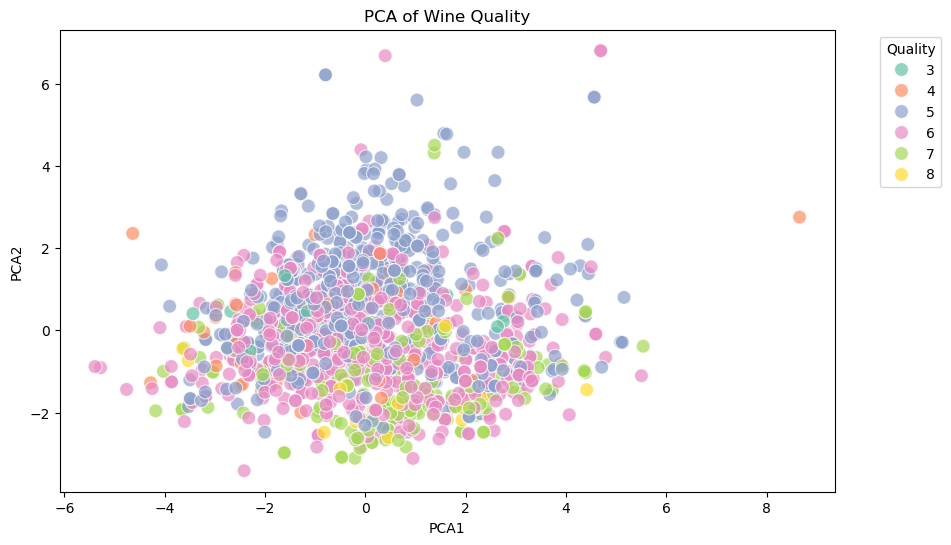

In [18]:
# plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='quality', palette='Set2', s=100, alpha=0.7)
plt.title("PCA of Wine Quality")
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Comentarios PCA

* Al usar PCA por cada calidad por separado no se logra ver una separacion clara o una segmentacion de las clases

# t-SNE

In [19]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300).fit_transform(X_scaled)
print(tsne.shape)

# convert to dataframe
df_tsne = pd.DataFrame(data=tsne, columns=['TSNE1', 'TSNE2'])
df_tsne.head()

(1599, 2)


TSNE1     TSNE2
0 -7.093381  3.677259
1 -4.082729  6.104656
2 -3.970261  5.658445
3  6.245629  0.349535
4 -7.093314  3.677324

In [20]:
# add quality column to the t-SNE dataframe
df_tsne['quality'] = df_wine['quality'].values
df_tsne.head()

TSNE1     TSNE2  quality
0 -7.093381  3.677259        5
1 -4.082729  6.104656        5
2 -3.970261  5.658445        5
3  6.245629  0.349535        6
4 -7.093314  3.677324        5

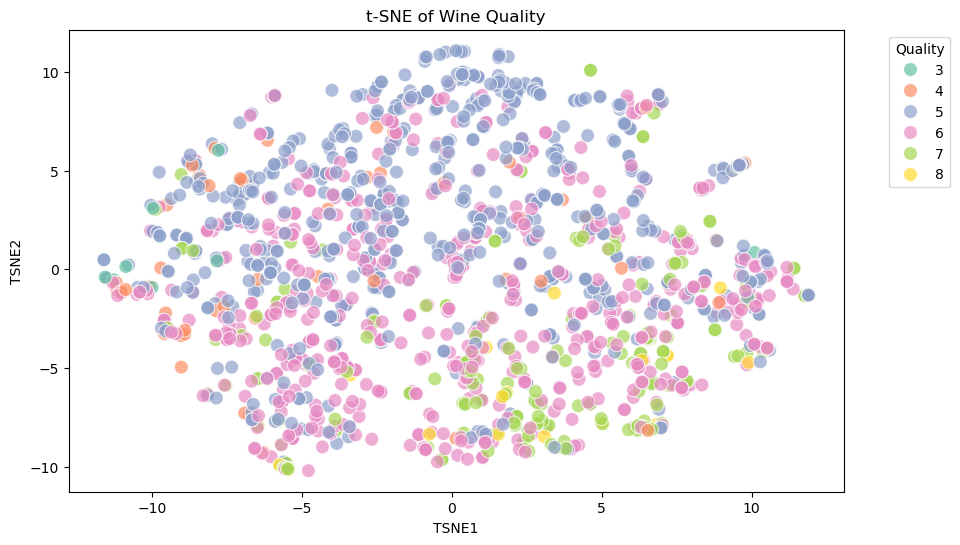

In [21]:
# plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='quality', palette='Set2', s=100, alpha=0.7)
plt.title("t-SNE of Wine Quality")
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Comentarios t-SNE

* Al usar t-SNE por cada calidad por separado no se logra ver una separacion clara o una segmentacion de las clases

# Conclusion de la separacion de calidad de los vinos de acuerdo a la calificacion del dataframe

* No es posible segmentar los datos de forma clara con ninguna de las 2 tecnicas, por lo que ahora realizare unna segementacion binaria de los datos, es decir, entre vinos buenos y malos y el crietrio sera

* `quality <= 5` = `peor calidad`
* `quality > 5` = `buena calidad`


In [22]:
df_wine['class'] = np.where(df_wine['quality'] > 5, 'buena calidad', 'peor calidad')
df_wine['class'].value_counts()

class
buena calidad    855
peor calidad     744
Name: count, dtype: int64

# PCA con 2 clases

In [23]:
# pca with 2 classes
pca2 = PCA(n_components=2).fit_transform(X_scaled)
print(pca2.shape)

# convert to dataframe
df_pca2 = pd.DataFrame(data=pca2, columns=['PCA1', 'PCA2'])

# add class column to the PCA dataframe
df_pca2['class'] = df_wine['class'].values
df_pca2.head()

(1599, 2)


PCA1      PCA2          class
0 -1.619530  0.450950   peor calidad
1 -0.799170  1.856553   peor calidad
2 -0.748479  0.882039   peor calidad
3  2.357673 -0.269976  buena calidad
4 -1.619530  0.450950   peor calidad

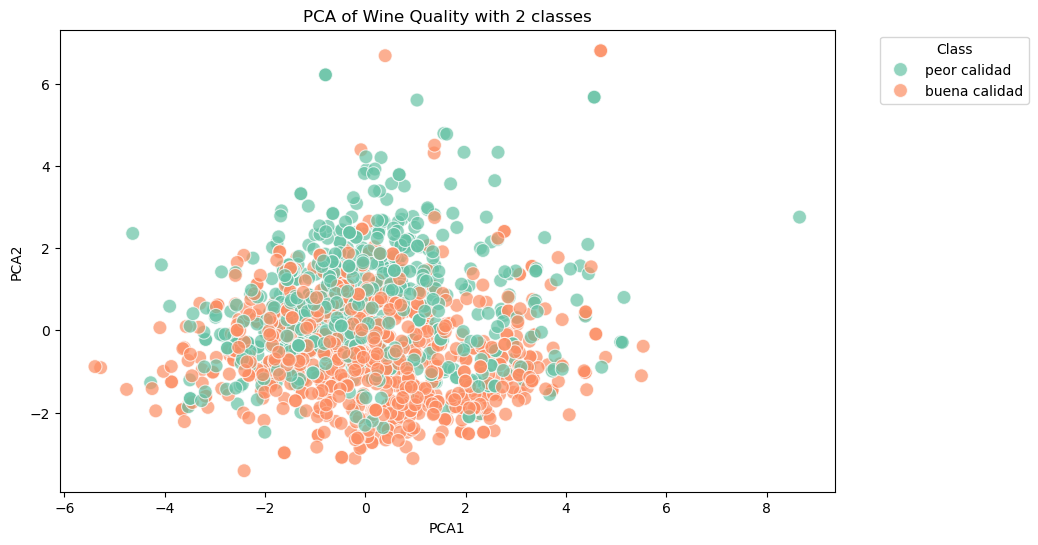

In [24]:
# plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca2, x='PCA1', y='PCA2', hue='class', palette='Set2', s=100, alpha=0.7)
plt.title("PCA of Wine Quality with 2 classes")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# t-SNE con 2 clases

In [25]:
# t-SNE
tsne2 = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
X_tsne2 = tsne2.fit_transform(X_scaled)
print(X_tsne2.shape)

# convert to dataframe
df_tsne2 = pd.DataFrame(data=X_tsne2, columns=['TSNE1', 'TSNE2'])

# add class column to the t-SNE dataframe
df_tsne2['class'] = df_wine['class'].values
df_tsne2.head()

(1599, 2)


TSNE1     TSNE2          class
0 -7.093381  3.677259   peor calidad
1 -4.082729  6.104656   peor calidad
2 -3.970261  5.658445   peor calidad
3  6.245629  0.349535  buena calidad
4 -7.093314  3.677324   peor calidad

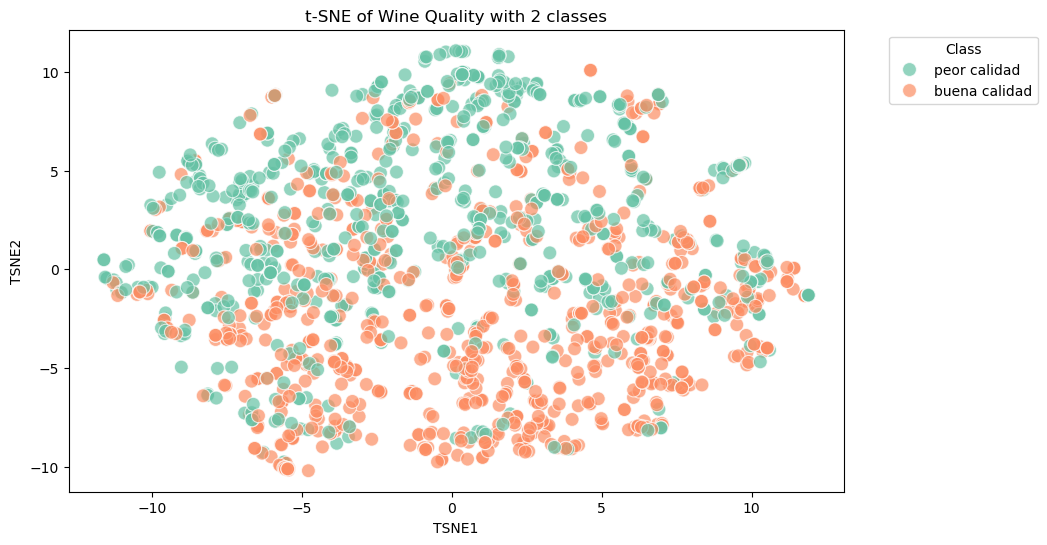

In [26]:
# plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne2, x='TSNE1', y='TSNE2', hue='class', palette='Set2', s=100, alpha=0.7)
plt.title("t-SNE of Wine Quality with 2 classes")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Graficos

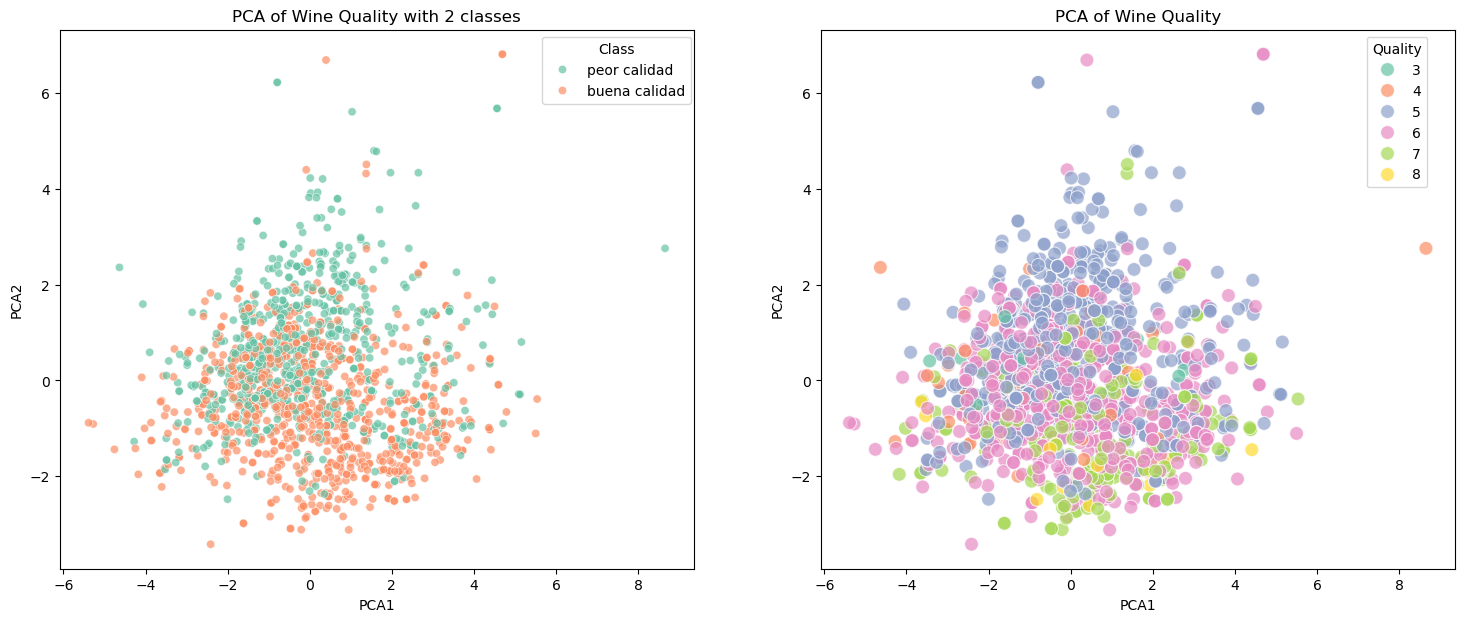

In [34]:
# PCA both charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.scatterplot(data=df_pca2, x='PCA1', y='PCA2', hue='class', palette='Set2', alpha=0.7, ax=axes[0])
axes[0].set_title("PCA of Wine Quality with 2 classes")
axes[0].legend(title='Class', bbox_to_anchor=(0.75, 1), loc='upper left')

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='quality', palette='Set2', s=100, alpha=0.7, ax=axes[1])
axes[1].set_title("PCA of Wine Quality")
axes[1].legend(title='Quality', bbox_to_anchor=(0.85, 1), loc='upper left')
plt.show()

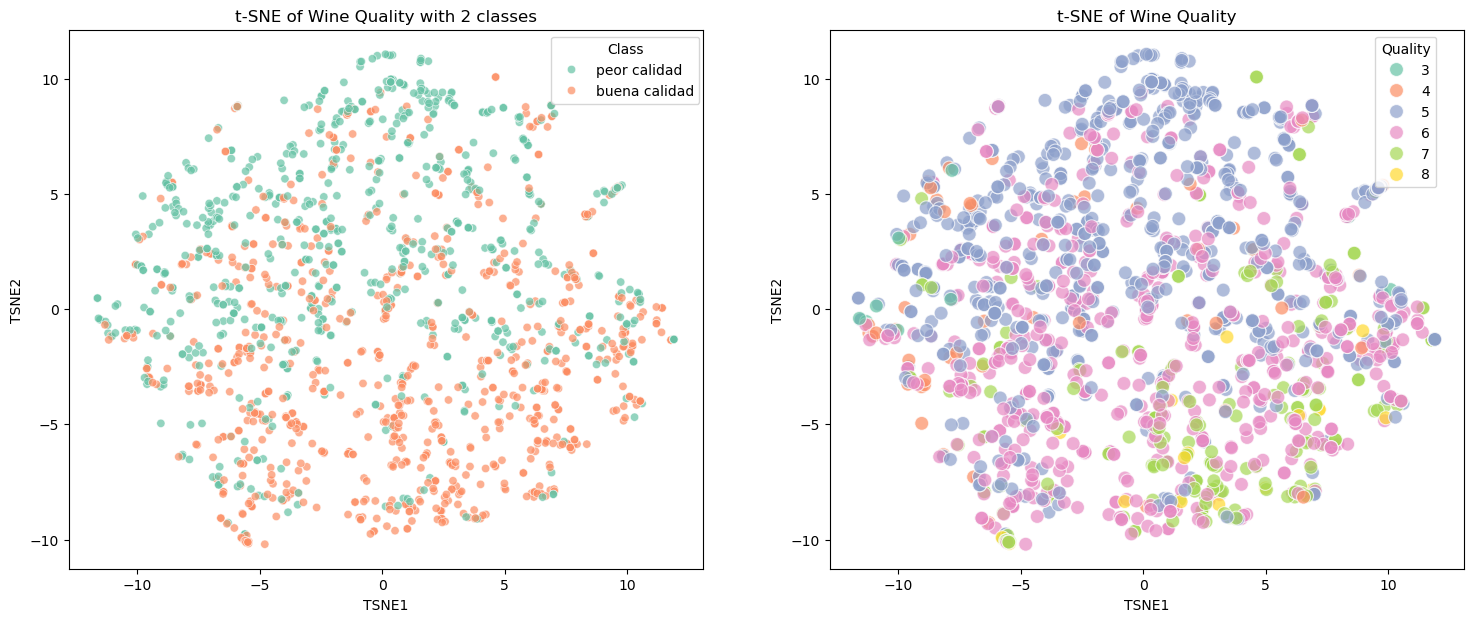

In [35]:
# t-SNE both charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.scatterplot(data=df_tsne2, x='TSNE1', y='TSNE2', hue='class', palette='Set2', alpha=0.7, ax=axes[0])
axes[0].set_title("t-SNE of Wine Quality with 2 classes")
axes[0].legend(title='Class', bbox_to_anchor=(0.75, 1), loc='upper left')

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='quality', palette='Set2', s=100, alpha=0.7, ax=axes[1])
axes[1].set_title("t-SNE of Wine Quality")
axes[1].legend(title='Quality', bbox_to_anchor=(0.85, 1), loc='upper left')
plt.show()

# conclusion

* Ninguna de las técnicas permitió separar claramente las clases de calidad del vino en las visualizaciones.
* Los datos de calidad parecen estar mezclados y no muestran grupos claramente definidos.